In [1]:
%load_ext lab_black
%load_ext autotime
import pandas as pd
import numpy as np
import drnb as nb

time: 5.92 s (started: 2022-09-04 14:52:39 -07:00)


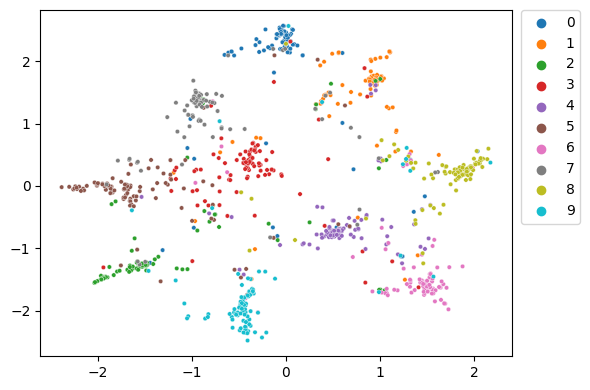

time: 9 s (started: 2022-09-04 14:52:45 -07:00)


In [2]:
s1k_pymde = nb.embed_data("s1k", method="pymde")

PyMDE parameters from the docstring for [preserve_neighbors](https://github.com/cvxgrp/pymde/blob/0e9ab9ddccffb0bdc559cec7f7c614a5c1f0b93d/pymde/recipes.py#L221)

* `attractive_penalty=pymde.functions.penalties.Log1p`: the attractive part of the cost function. Other penalties from the same module are `Huber` or `Quadratic`.
* `repulsive_penalty=pymde.functions.penalties.Log`: the repulsive part of the cost function. Another suitable penalty from the same module is `Quadratic`. If `None` then only positive interactions are considered. 
* `constraint=None`: a constraint (e.g. from `pymde.constraints`). If a `repulsive_penalty` is provided then this is not used, otherwise `pymde.Standardized()` is used.
* `n_neighbors=None`: by default, a value between `5-15` is used, depending on an attempt to use ~1% of the total edges in the dataset as positive edges. Practically, this means datasets < 1200 items have `n_neighbors=5`, and datasets > 3000 have `n_neighbors=15`. 
* `repulsive_fraction=None`: fraction of edges (relative to the number of attractive edges) to include in the `repulsive_penalty` calculation. Usually `1`, i.e. the same number of repulsive edges as attractive edges.
* `max_distance=None` If set, the maximum distance a nearest neighbor can have.
* `init="quadratic"` The initialization method. The default, `"quadratic"`, is a Laplacian eigenmap initialization. Otherwise, `"random"` is a random initialization using normal distribution (mean 0, standard deviation 1).

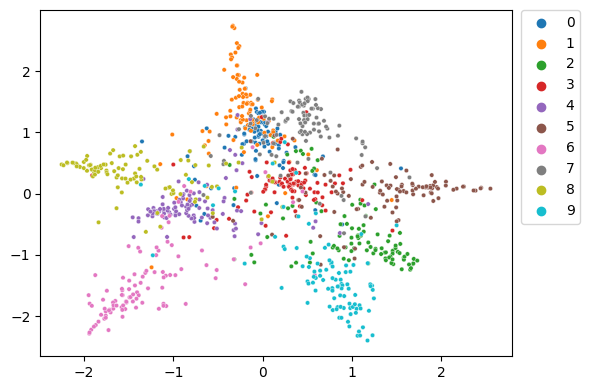

time: 6.55 s (started: 2022-09-04 14:52:54 -07:00)


In [3]:
import pymde

s1k_pymde_laplacian = nb.embed_data(
    "s1k",
    method=nb.embedder(
        "pymde",
        seed=42,
        params=dict(
            attractive_penalty=pymde.penalties.Quadratic, repulsive_penalty=None
        ),
    ),
)